In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../data/BTC_All_graph_coinmarketcap.csv', delimiter=';')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.to_period('M')
df['marketCap_billion'] = df['marketCap']/1e9
df.head()

C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\197699701.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date'] = df['timestamp'].dt.to_period('M')


,open,high,low,close,volume,marketCap,timestamp,date,marketCap_billion
0,135.300003,147.488007,132.100006,139.000000,0.0,1.542813e+09,2013-04-01 00:00:00+00:00,2013-04,1.542813
1,139.000000,139.889999,79.099998,129.000000,0.0,1.447870e+09,2013-05-01 00:00:00+00:00,2013-05,1.447870
2,128.815002,129.779999,88.500000,96.613998,0.0,1.096958e+09,2013-06-01 00:00:00+00:00,2013-06,1.096958
3,97.510002,111.344002,65.526001,106.089996,0.0,1.218778e+09,2013-07-01 00:00:00+00:00,2013-07,1.218778
4,106.212997,140.889999,101.210999,135.350006,0.0,1.574672e+09,2013-08-01 00:00:00+00:00,2013-08,1.574672


In [3]:
# Calculate percentage change
df['marketCap_percentage_change'] = df['marketCap_billion'].pct_change() * 100

In [4]:
df_after_2019 = df.loc[df['date'] >= '2019-01']

# Calculate percentage change compared to the last month
df_after_2019['marketCap_percentage_change'] = df_after_2019['marketCap_billion'].pct_change() * 100

first_month_marketCap = df_after_2019.loc[df_after_2019['date'] == '2019-01', 'marketCap_billion'].values[0]
df_after_2019['marketCap_percentage_change'] = ((df_after_2019['marketCap_billion'] - first_month_marketCap) / first_month_marketCap) * 100



C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\2797331679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2019['marketCap_percentage_change'] = df_after_2019['marketCap_billion'].pct_change() * 100
C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\2797331679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2019['marketCap_percentage_change'] = ((df_after_2019['marketCap_billion'] - first_month_marketCap) / first_month_marketCap) * 100


In [5]:
print(df['marketCap'].dtype)

float64


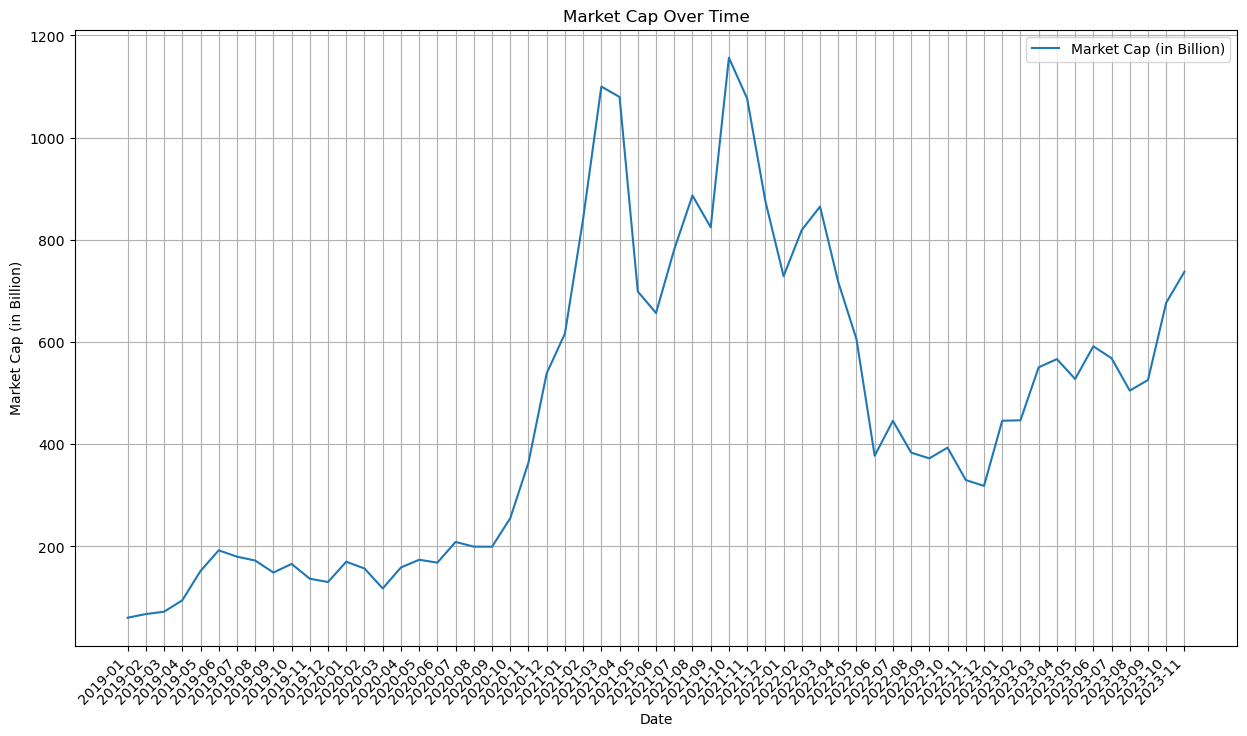

In [6]:
# Plotting the 'marketCap' over time
plt.figure(figsize=(15, 8))
plt.plot(df_after_2019['date'].astype(str), df_after_2019['marketCap_billion'], label='Market Cap (in Billion)')
plt.title('Market Cap Over Time')
plt.xlabel('Date')
plt.ylabel('Market Cap (in Billion)')
plt.legend()

xticks = df['date'][::5].astype(str)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks
plt.grid(True)
plt.show()


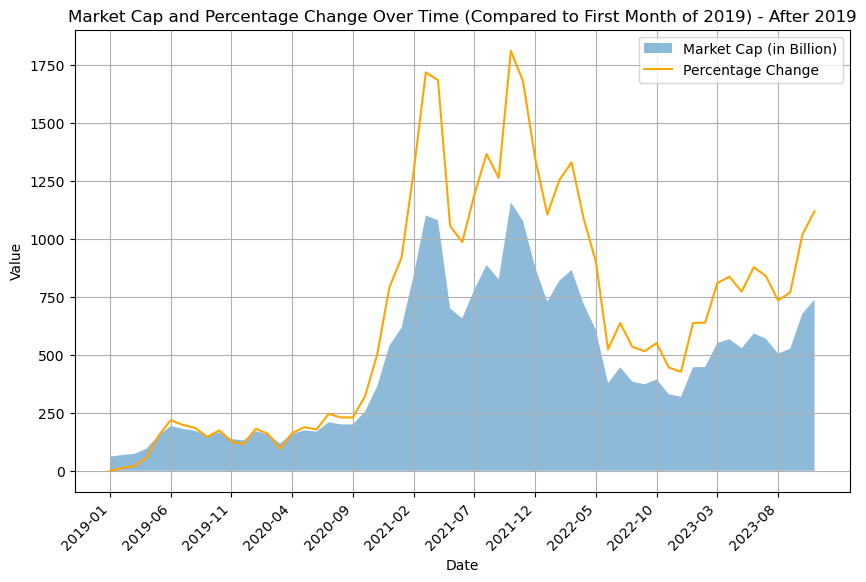

In [7]:
# Plotting the 'marketCap' and percentage change over time
plt.figure(figsize=(10, 6))
plt.fill_between(df_after_2019['date'].astype(str), 0, df_after_2019['marketCap_billion'], label='Market Cap (in Billion)', alpha=0.5)
plt.plot(df_after_2019['date'].astype(str), df_after_2019['marketCap_percentage_change'], label='Percentage Change', color = 'orange')
plt.title('Market Cap and Percentage Change Over Time (Compared to First Month of 2019) - After 2019')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Set x-axis ticks for every 5 months
xticks = df_after_2019['date'][::5].astype(str)
plt.xticks(xticks, rotation=45, ha='right')  # Rotate x-axis ticks
plt.grid(True)

plt.show()


C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\2323769536.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(unique_years))


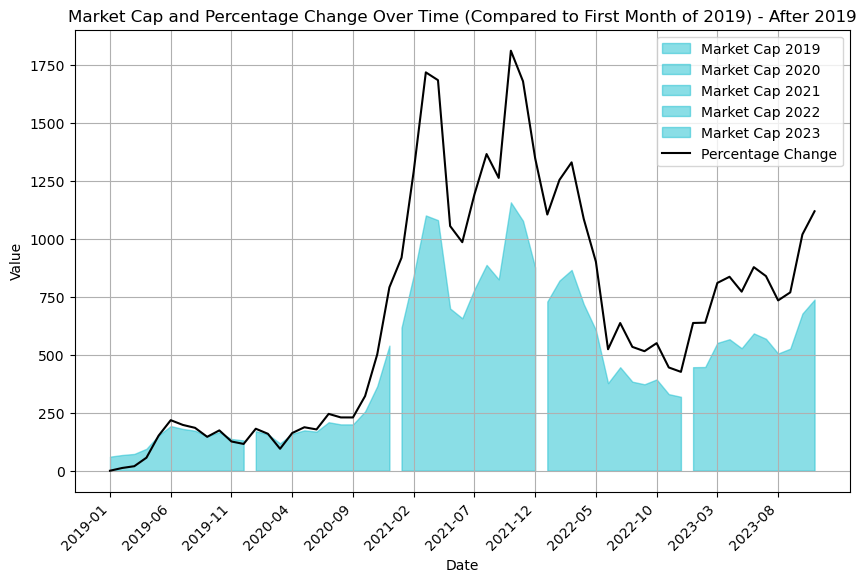

In [8]:
# Get unique years in the dataset
unique_years = df_after_2019['date'].dt.year.unique()

# Define a color map for the years
color_map = plt.cm.get_cmap('tab10', len(unique_years))

# Plotting the 'marketCap' and percentage change over time using area plot
plt.figure(figsize=(10, 6))

for year in unique_years:
    # Filter data for the current year
    year_data = df_after_2019[df_after_2019['date'].dt.year == year]
    
    # Plot Market Cap as an area plot with different colors for each year
    plt.fill_between(year_data['date'].astype(str), 0, year_data['marketCap_billion'], label=f'Market Cap {year}', alpha=0.5, color=color_map(year / len(unique_years)))

# Plot Percentage Change as a line plot
plt.plot(df_after_2019['date'].astype(str), df_after_2019['marketCap_percentage_change'], label='Percentage Change', color='black')

plt.title('Market Cap and Percentage Change Over Time (Compared to First Month of 2019) - After 2019')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Set x-axis ticks for every 5 months
xticks = df_after_2019['date'][::5].astype(str)
plt.xticks(xticks, rotation=45, ha='right')  # Rotate x-axis ticks
plt.grid(True)

plt.show()


C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\116964925.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\116964925.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2019['marketCap_percentage_change'] = df_after_2019['marketCap_billion'].pct_change() * 100
C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\116964925.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map

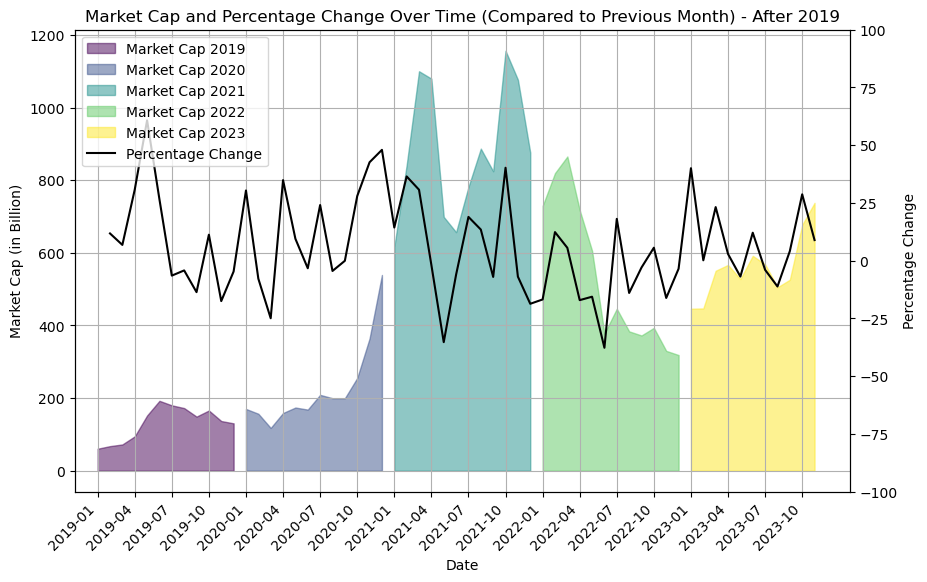

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'date' is not in datetime format, convert it
df['date'] = pd.to_datetime(df['timestamp']).dt.to_period('M')

# Assuming 'marketCap' is in scientific notation (e.g., 1.542813e+09)
df['marketCap_billion'] = df['marketCap'] / 1e9

# Filter data for the year 2019 onwards using loc
df_after_2019 = df.loc[df['date'] >= '2019-01']

# Calculate percentage change compared to the last month
df_after_2019['marketCap_percentage_change'] = df_after_2019['marketCap_billion'].pct_change() * 100

# Get unique years in the dataset
unique_years = df_after_2019['date'].dt.year.unique()

# Define a color map for the years
color_map = plt.cm.get_cmap('viridis', len(unique_years))

# Plotting the 'marketCap' and percentage change over time using area plot
fig, ax1 = plt.subplots(figsize=(10, 6))

for i, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = df_after_2019[df_after_2019['date'].dt.year == year]
    
    # Plot Market Cap as an area plot with different colors for each year
    ax1.fill_between(year_data['date'].astype(str), 0, year_data['marketCap_billion'], label=f'Market Cap {year}', alpha=0.5, color=color_map(i / (len(unique_years)-1)))

# Set x-axis ticks for every 5 months
xticks = df_after_2019['date'][::3].astype(str)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks, rotation=45, ha='right')  # Rotate x-axis ticks
ax1.grid(True)

# Add a secondary y-axis for percentage change
ax2 = ax1.twinx()
ax2.plot(df_after_2019['date'].astype(str), df_after_2019['marketCap_percentage_change'], label='Percentage Change', color='black')
ax2.set_ylabel('Percentage Change', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim([-100, 100])  # Set y-axis limits for the secondary axis

# Title and labels
plt.title('Market Cap and Percentage Change Over Time (Compared to Previous Month) - After 2019')
ax1.set_xlabel('Date')
ax1.set_ylabel('Market Cap (in Billion)')

# Display legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\3208845508.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\3208845508.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_years))


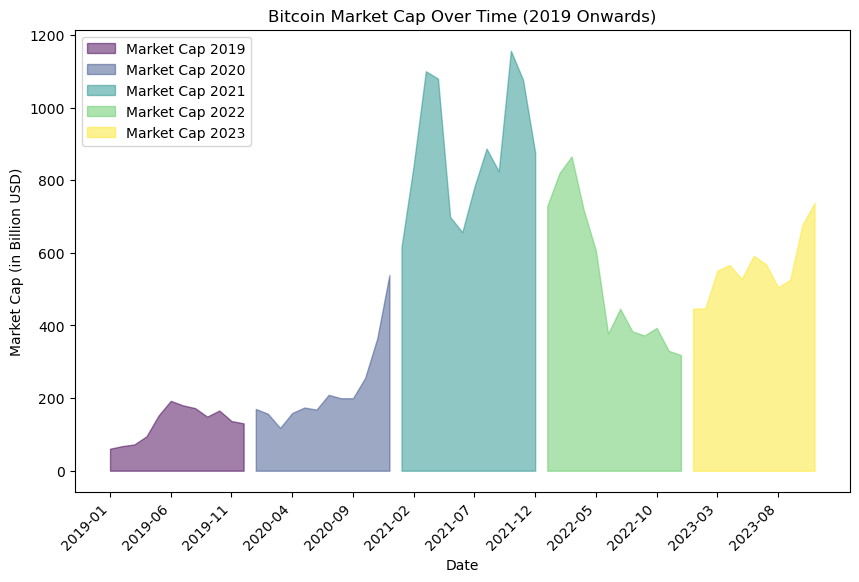

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is not in datetime format, convert it
df['date'] = pd.to_datetime(df['timestamp']).dt.to_period('M')

# Assuming 'marketCap' is in scientific notation (e.g., 1.542813e+09)
df['marketCap_billion'] = df['marketCap'] / 1e9

# Sort the DataFrame by date
df = df.sort_values(by='date')

# Filter data for the year 2019 onwards using loc
df_after_2019 = df.loc[df['date'] >= '2019-01']

# Get unique years in the dataset
unique_years = df_after_2019['date'].dt.year.unique()

# Define a color map for the years
color_map = plt.cm.get_cmap('viridis', len(unique_years))

# Plotting the 'marketCap' over time using area plot
fig, ax1 = plt.subplots(figsize=(10, 6))

for i, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = df_after_2019[df_after_2019['date'].dt.year == year]
    
    # Plot Market Cap as an area plot with different colors for each year
    ax1.fill_between(year_data['date'].astype(str), 0, year_data['marketCap_billion'], label=f'Market Cap {year}', alpha=0.5, color=color_map(i / (len(unique_years)-1)))

# Set x-axis ticks for every 5 months
xticks = df_after_2019['date'][::5].astype(str)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks, rotation=45, ha='right')  # Rotate x-axis ticks

# Turn off the grid
ax1.grid(False)

# Title and labels
plt.title('Bitcoin Market Cap Over Time (2019 Onwards)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Market Cap (in Billion USD)')

# Display legends
ax1.legend(loc='upper left')

plt.show()


C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\1639039468.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_11284\1639039468.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_years))


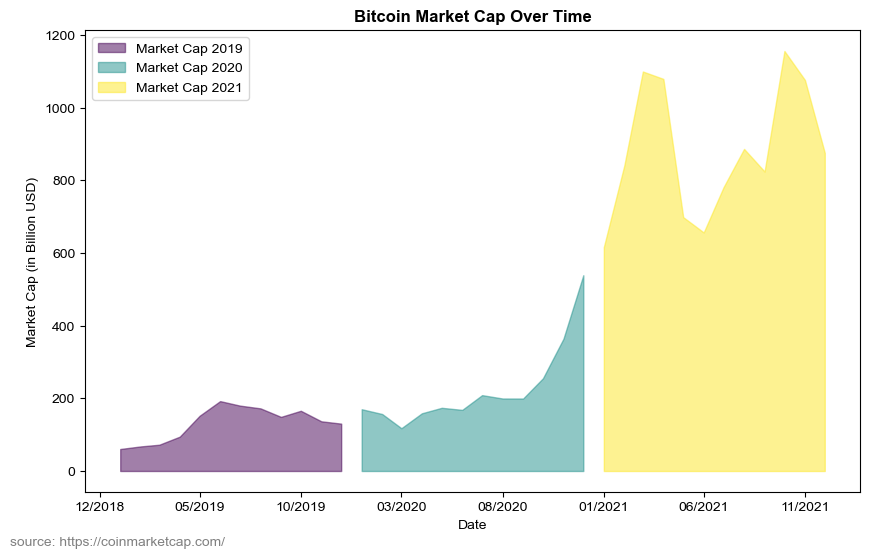

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'date' is not in datetime format, convert it
df['date'] = pd.to_datetime(df['timestamp']).dt.to_period('M')

# Ensure that 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'].astype(str))

# Assuming 'marketCap' is in scientific notation (e.g., 1.542813e+09)
df['marketCap_billion'] = df['marketCap'] / 1e9

# Sort the DataFrame by date
df = df.sort_values(by='date')

# Filter data for the year 2019 onwards using loc
df_after_2019 = df.loc[(df['date'] >= '2019-01') & (df['date'] < '2022-01-01')]

# Get unique years in the dataset
unique_years = df_after_2019['date'].dt.year.unique()

# Define a color map for the years
color_map = plt.cm.get_cmap('viridis', len(unique_years))

# Plotting the 'marketCap' over time using area plot
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'

for i, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = df_after_2019[df_after_2019['date'].dt.year == year]
    
    # Plot Market Cap as an area plot with different colors for each year
    ax1.fill_between(year_data['date'], 0, year_data['marketCap_billion'], label=f'Market Cap {year}', alpha=0.5, color=color_map(i / (len(unique_years)-1)))

# Set x-axis ticks every 5 months as a period
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
ax1.tick_params(axis='x', rotation=0)

# Turn off the grid
ax1.grid(False)

# Title and labels
plt.title('Bitcoin Market Cap Over Time', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Market Cap (in Billion USD)')

# Display legends
ax1.legend(loc='upper left')
# Add a footer
fig.text(0.05, 0.02, 'source: https://coinmarketcap.com/', fontsize=10, color='gray')

save_path = "../img/bitcoin_market_cap_over_time.png"
plt.savefig(save_path, bbox_inches='tight')

plt.show()
